In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
from random import choice
from datetime import *
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
bike = pd.read_csv("/content/drive/MyDrive/bike_trips.csv")

#Exploring the Data 

###Displaying the first 5 rows in the dataset

In [ ]:
bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [ ]:
bike_orgi = bike.copy()

###Summary Statistics

In [ ]:
bike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


###Number of null values in each column

In [ ]:
bike.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

###Number of duplicated rows in the dataset

In [ ]:
bike.duplicated().sum() #No duplicated rows

0

###Exploring Datatypes and if there are null values

In [ ]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

##Changing datatypes and renaming columns
#### We have columns with wrong datatype, so we are going to change it to the corret datatype. <br>
*   start_time. object ➜ datetime

*   end_time. object ➜ datetime

*   user_type. object ➜ category

*   member_birth_year. float64 ➜ datetime

*   bike_share_for_all_trip. object ➜ category


####Renaming columns
*   member_birth_year object ➜ birth_year

*   member_gender ➜ gender

###For start_time, end_time, and member_birth_year columns should be datetime, because we are dealing with date, and time. 
### user_type, and bike_share_for_all_trip Changing theses columns to object datatype is not a high priority

In [ ]:
bike['start_time'] = pd.to_datetime(bike['start_time'])
bike['end_time'] = pd.to_datetime(bike['end_time'])
# bike['birth_year'] = pd.to_datetime(bike['member_birth_year'])
bike['user_type'] = bike['user_type'].astype('category')
bike['gender'] = bike['member_gender'].astype('object')
bike['bike_share_for_all_trip'] = bike['bike_share_for_all_trip'].astype('category')
#Getting the age from birthday
bike['age'] = 2022 - bike['member_birth_year']

In [ ]:
bike['age'] = bike['age'].fillna(bike['age'].mean())
bike['gender'] = bike['gender'].fillna('Other')
bike['start_station_name'] = bike['start_station_name'].fillna(bike['start_station_name'].mode())
bike['end_station_name'] = bike['end_station_name'].fillna(bike['end_station_name'].mode())

##Exctracting new Columns


In [ ]:
#Extracting 4 new columns for start time
bike['start_time_min'] = bike['start_time'].dt.minute
bike['start_time_hour'] = bike['start_time'].dt.hour
bike['start_time_day'] = bike['start_time'].dt.day 


#Extracting new column for end time
bike['end_time_hour'] = bike['end_time'].dt.hour

In [ ]:
bike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,age,start_time_min,start_time_hour,start_time_day,end_time_hour
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000,175147.000000,183412.000000,183412.000000,183412.000000,183412.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437,37.193563,29.451317,13.458421,15.298977,13.614769
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689,10.116689,17.368447,4.724978,8.028187,4.739638
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000,21.000000,0.000000,0.000000,1.000000,0.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000,30.000000,14.000000,9.000000,8.000000,9.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000,35.000000,29.000000,14.000000,15.000000,14.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000,42.000000,45.000000,17.000000,22.000000,18.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000,144.000000,59.000000,23.000000,28.000000,23.000000


In [ ]:
bike.isnull().sum()

duration_sec                 0
start_station_name         197
end_station_name           197
user_type                    0
bike_share_for_all_trip      0
gender                       0
age                          0
start_time_min               0
start_time_hour              0
start_time_day               0
end_time_hour                0
dtype: int64

###Deleting unwatned columns and renaming some columns


*   Deleting colunmns where it is not useful in understanding the data nor in building the Machine Learning Model




In [ ]:
bike = bike.drop(['start_station_id', 'start_station_latitude', 'start_station_longitude',
                  'end_station_id', 'end_station_latitude', 'end_station_longitude',
                  'member_birth_year','member_gender', 'bike_id', 'start_time', 'end_time'
                  ], axis=1)

In [ ]:
bike.columns

Index(['duration_sec', 'start_station_name', 'end_station_name', 'user_type',
       'bike_share_for_all_trip', 'gender', 'age', 'start_time_min',
       'start_time_hour', 'start_time_day', 'end_time_hour'],
      dtype='object')

In [ ]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   duration_sec             183412 non-null  int64   
 1   start_station_name       183215 non-null  object  
 2   end_station_name         183215 non-null  object  
 3   user_type                183412 non-null  category
 4   bike_share_for_all_trip  183412 non-null  category
 5   gender                   175147 non-null  object  
 6   age                      175147 non-null  float64 
 7   start_time_min           183412 non-null  int64   
 8   start_time_hour          183412 non-null  int64   
 9   start_time_day           183412 non-null  int64   
 10  end_time_hour            183412 non-null  int64   
dtypes: category(2), float64(1), int64(5), object(3)
memory usage: 12.9+ MB


## STEP5: **Analysis Phase**
In this phase, we will use tow methods to answer our questions, and these methods are:
* **Exploratory Analysis**
* **Visual Analysis** 

But first, we need to define our questions.

> ## Questions
1. How much is the daily bike usage?
2. The daily usage of bikes based on User Type?
3. The daily usage of bikes based on User Type and Member Gender?
4. Most on demand hours
5. Most on demand days
6. The duration in hours based on user type and age
7. How much is the bike share?
8. What is the top 5 stations?
9. Who uses the bike more, customers or subscribers?
10. What is Most end time hour?


**Now, Let’s Start Answering these questions**

> ### Method 1: **Exploratory Analysis**

Popular functions used in this method:
* **value_counts()**
* **groupby()**
* **pivot_table()**
* **query()**
* **Logical operators**

> ### Method 2: **Visual Analysis** 
Important Charts for Visualisation:
* **Histogram**
* **Bar Chart**
* **Pie Chart**
* **Box Plot**
* **Scatter Plot**
* **Line Chart**

## Types of Visual Analysis:
> ### Univariate Exploration
~ **Univariate analysis** involves analysis of one variable at a time

In [ ]:
sns.set_theme(style="darkgrid")

#### 1. First Question 
1. How much is the daily bike usage?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


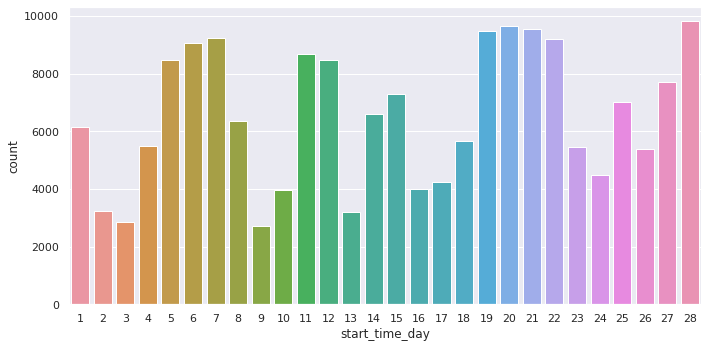

In [ ]:
# codes that help you to answer your question
plt.figure(figsize=[10,5]) 
sns.countplot(bike['start_time_day']
)

#### 2. Second Question 
The daily usage of bikes based on User Type?


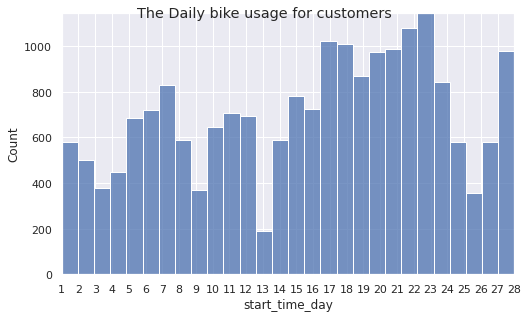

In [ ]:
# codes that help you to answer your question
plt.rcParams["figure.figsize"] = [7.50, 4.50]
plt.rcParams["figure.autolayout"] = True
bike_customer = bike[bike['user_type'] == 'Customer'].start_time_day
x = np.arange(0, 29)
plt.xticks(x)
plt.margins(x=0, y=0)
plt.suptitle('The Daily bike usage for customers')
sns.histplot(bike_customer, bins=28, palette=sns.color_palette('Blues'))

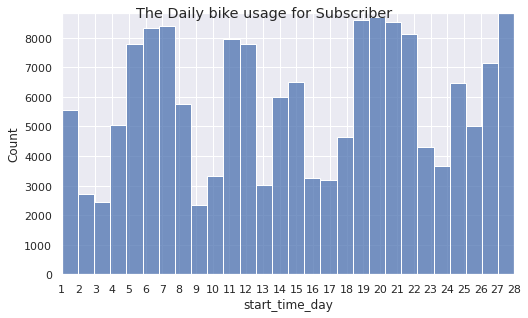

In [ ]:
# codes that help you to answer your question
plt.rcParams["figure.figsize"] = [7.50, 4.50]
plt.rcParams["figure.autolayout"] = True
bike_customer = bike[bike['user_type'] == 'Subscriber'].start_time_day
x = np.arange(0, 29)
plt.xticks(x)
plt.margins(x=0, y=0)
plt.suptitle('The Daily bike usage for Subscriber')
sns.histplot(bike_customer, bins=28, palette=sns.color_palette('Blues'))

#### 3. Third Question 
4. Most on demand hours


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


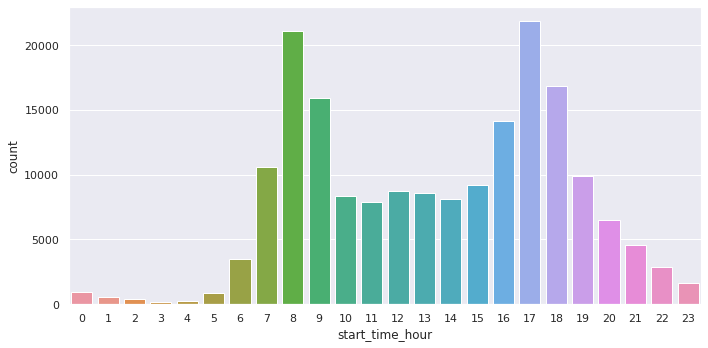

In [ ]:
# codes that help you to answer your question 
plt.figure(figsize=[10,5]) 
sns.countplot(bike['start_time_hour'])

#### 4. Fourth Question 
5. Most on demand days


In [ ]:
# codes that help you to answer your question 
bike['start_time_day'].value_counts()[:10]

28    9829
20    9667
21    9536
19    9467
7     9234
22    9204
6     9057
11    8681
5     8486
12    8473
Name: start_time_day, dtype: int64

**Conclusion**: days: 28, 20, 21, 19 have the highest demand

#### 5. Fourth Question 
7. How much is the bike share?


In [ ]:
bike['bike_share_for_all_trip'].value_counts()

No     166053
Yes     17359
Name: bike_share_for_all_trip, dtype: int64

**Conclusion**: Bike share is around 10%, which is not very high

#### 6. Fourth Question 
8. What is the top 5 stations?

In [ ]:
bike['start_station_name'].value_counts()

Market St at 10th St                                         3904
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3544
Berry St at 4th St                                           3052
Montgomery St BART Station (Market St at 2nd St)             2895
Powell St BART Station (Market St at 4th St)                 2760
                                                             ... 
Willow St at Vine St                                            9
Parker Ave at McAllister St                                     7
Palm St at Willow St                                            4
21st Ave at International Blvd                                  4
16th St Depot                                                   2
Name: start_station_name, Length: 329, dtype: int64

#### 6. Fourth Question 
10. What is Most end time hour?

In [ ]:
bike['end_time_hour'].value_counts()[:10]

17    21295
8     19782
18    18264
9     17684
16    13179
19    10730
10     8977
15     8835
7      8779
12     8617
Name: end_time_hour, dtype: int64

**Conclusion**: hours: 17, 8, 18, 9, and 16 are the top 5 hours that customers and subscribers end their trips

> ### Bivariate Exploration
~ **Bivariate analysis** is finding some kind of empirical relationship between two variables

#### 1. First Question 
What is the age distrubtion

In [ ]:
bike.age.value_counts()

34.0     10236
29.0      9325
33.0      8972
32.0      8658
31.0      8498
         ...  
94.0         1
144.0        1
92.0         1
112.0        1
95.0         1
Name: age, Length: 76, dtype: int64

**Conclusion**: 34, 29, 33, 32, 31 are the top 5 users

#### 2. Second Question 
Who tend to share their bike more? What is their ages?

In [ ]:
# codes that help you to answer your question 
bike.groupby(['bike_share_for_all_trip', 'user_type'])['age'].mean() 

bike_share_for_all_trip  user_type 
No                       Customer      36.729292
                         Subscriber    37.459077
Yes                      Customer            NaN
                         Subscriber    35.488968
Name: age, dtype: float64

**conclusion**: The mean of users age who tend to share their bikes are in 30s

#### 2. Third Question 
8.Who uses the bike more, customers or subscribers?

In [ ]:
bike.pivot_table(index='user_type', values='duration_sec')

,duration_sec
user_type,
Customer,1432.465019
Subscriber,640.263678


**conclusion**: Customers tend to have longer trips

> ### Multivariate Exploration
~ **Multivariate analysis** is based on the observation and analysis of more than one variable at the same time

#### 1. First Question 
3. The daily usage of bikes based on User Type and Member Gender?

In [ ]:
# codes that help you to answer your question 
bike.groupby(['user_type', 'gender'])[['start_time_day']].count()

start_time_day
user_type  gender                
Customer   Female            4647
           Male             11529
           Other              455
Subscriber Female           36197
           Male            119122
           Other             3197

**Conclusion**: Customer Female tend to have longer trips and Male Subscribers tend to have the shortest trips

#### 2. Second Question
6.The duration in hours based on user type and age

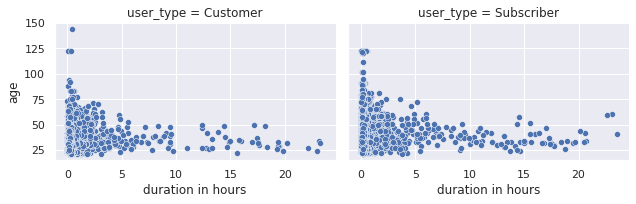

In [ ]:
# codes that help you to answer your question 
bike_hours = bike.duration_sec / 3600 #to convert it to hours
ax = sns.relplot(
    x=bike_hours, 
    y='age', 
    data=bike,
    palette='dark',
    height=3, aspect=1.5,
    kind='scatter', 
    col='user_type');
ax.set_xlabels('duration in hours')

**Conclusion**: Customers most likely to have trips below 10 hours, while subscribers tend to have trips up to 15 hours 